# 📊 Netflix Movies & TV Shows Analysis
In this project, I will analyze a dataset containing details about Netflix content.
I will:
- Load and explore the dataset
- Clean the data
- Answer questions with visualizations:
  - Movies vs TV Shows
  - Top producing countries
  - Release trends over time
  - Most common genres
Tools we will use:
- pandas: for data analysis
- matplotlib & seaborn: for visualization


# Import Libraries

In [31]:
# Import pandas for data manipulation and analysis
import pandas as pd  

# Import matplotlib for plotting graphs
import matplotlib.pyplot as plt  

# Import seaborn for prettier and more advanced visualizations
import seaborn as sns 

# Import Kagglehub to download the dataset
import kagglehub

# Set the default style for seaborn plots
sns.set(style="whitegrid")


## Step 1: Load the Dataset
I will load the `netflix_titles.csv` file into a pandas DataFrame.
Make sure the file path is correct for your system.
On Windows, you can:
- Use double backslashes `\\`
- Use a raw string `r"..."`  
- Use forward slashes `/` (recommended)


In [32]:
# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

# Make the plots look nicer
sns.set(style="whitegrid")

# Read the dataset CSV file from the local folder
# Using forward slashes in the path to avoid errors on Windows
df = pd.read_csv("C:/Users/mg177/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5/netflix_titles.csv")

# Show the first 5 rows of the dataset
df.head()



Path to dataset files: C:\Users\mg177\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Step 2: Explore the Dataset
We will:
- Check column names, data types, and missing values
- See basic statistical summaries
- Check the size of the dataset


In [33]:
# Get dataset info: column names, non-null counts, and data types
df.info()

# Get summary statistics for numeric columns
df.describe()

# Print number of rows and columns in the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Dataset contains 8807 rows and 12 columns


## Step 3: Clean the Data
We will:
- Remove duplicate rows
- Remove rows where important columns are missing:
  - country
  - date_added
  - release_year


In [34]:
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Remove rows with missing values in 'country', 'date_added', or 'release_year'
df.dropna(subset=['country', 'date_added', 'release_year'], inplace=True)

# Show the new size after cleaning
print(f"After cleaning: {df.shape[0]} rows remain")


After cleaning: 7967 rows remain


## Step 4: Movies vs TV Shows
We will count how many entries are "Movie" and how many are "TV Show" and show them in a bar plot.


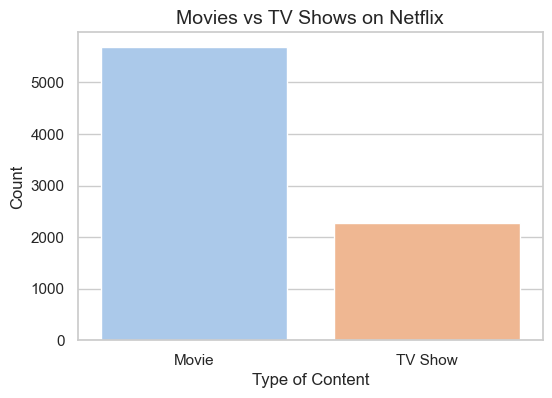

In [35]:
# Create a figure with specific size
plt.figure(figsize=(6, 4))

# Create a countplot for the 'type' column using 'type' as hue
sns.countplot(x='type', hue='type', data=df, palette='pastel', legend=False)

# Add a title and labels
plt.title('Movies vs TV Shows on Netflix', fontsize=14)
plt.xlabel('Type of Content')
plt.ylabel('Count')

# Display the plot
plt.show()


## Step 5: Top 10 Countries Producing Netflix Content
We will count how many titles come from each country and plot the top 10.


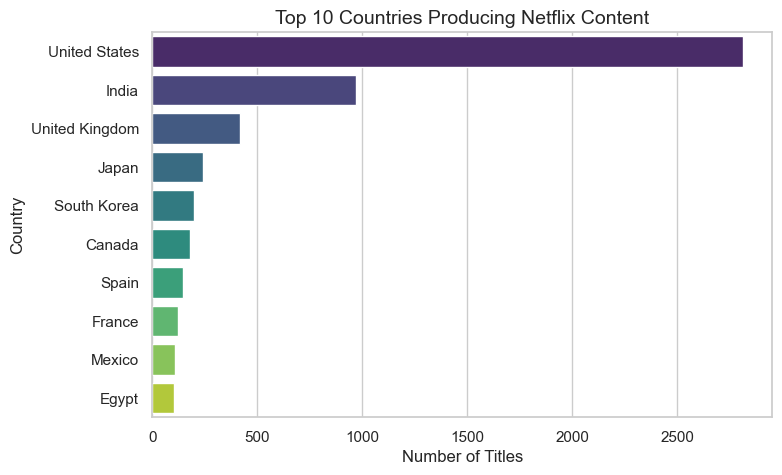

In [36]:
# Count titles per country and get top 10
top_countries = df['country'].value_counts().head(10)

# Convert to DataFrame for plotting with hue
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['country', 'count']

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_countries_df,
    x='count',
    y='country',
    hue='country',
    palette='viridis',
    legend=False
)

# Add title and labels
plt.title('Top 10 Countries Producing Netflix Content', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')

# Show the plot
plt.show()


## Step 6: Number of Releases Over Time
We will:
- Convert 'date_added' to a datetime format
- Extract the year
- Count how many titles were added each year


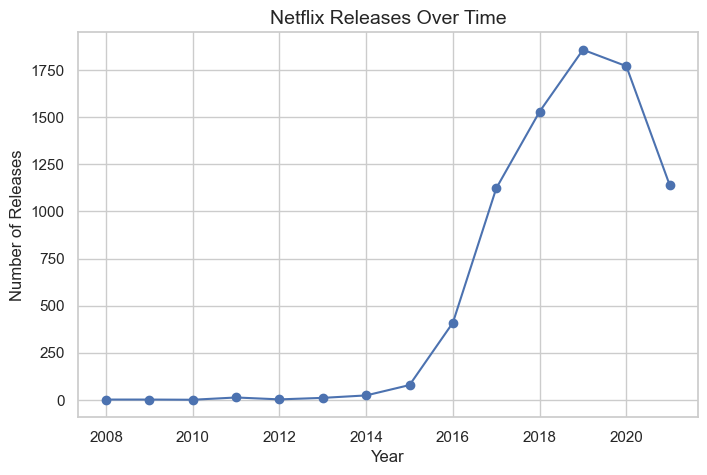

In [37]:
# Convert 'date_added' to datetime, handling mixed formats and invalid entries
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')

# Extract the year
df['year_added'] = df['date_added'].dt.year

# Count number of releases per year, sorted by year
releases_per_year = df['year_added'].value_counts().sort_index()

# Plot the number of releases over time
plt.figure(figsize=(8, 5))
plt.plot(releases_per_year.index, releases_per_year.values, marker='o')

# Add title and labels
plt.title('Netflix Releases Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


## Step 7: Most Common Genres
We will:
- Split the 'listed_in' column (contains genres) into individual genres
- Count how many times each genre appears
- Show the top 10 genres in a bar chart


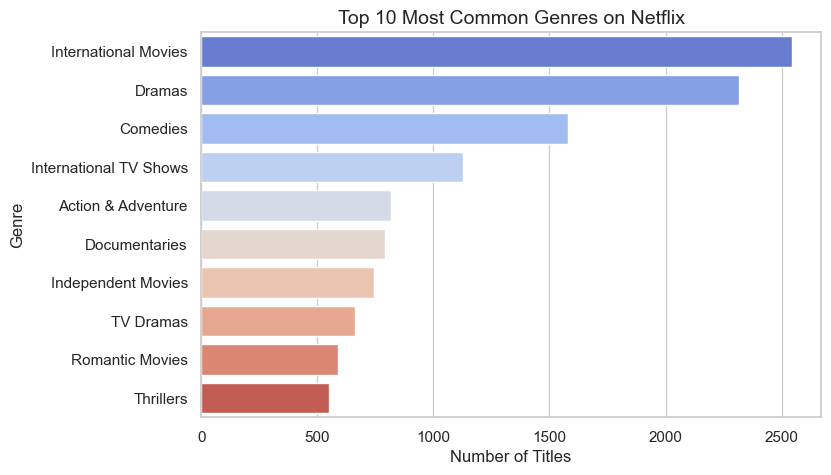

In [38]:
from collections import Counter

# Create a list of all genres
all_genres = []

# Extract and split genres
for genre_list in df['listed_in']:
    genres = genre_list.split(', ')
    all_genres.extend(genres)

# Count the frequency of each genre
genre_counts = Counter(all_genres).most_common(10)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Count',
    y='Genre',
    data=genre_df,
    hue='Genre',
    palette='coolwarm',
    legend=False
)

# Add title and labels
plt.title('Top 10 Most Common Genres on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')

# Show plot
plt.show()


## Step 8: Summary of Findings
Based on our analysis:
- Netflix has more movies than TV shows.
- The USA produces the most Netflix content.
- Releases peaked around 2019.
- The most common genre is **International Movies**.
